In [1]:
# from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras import layers
from tensorflow import keras
import tensorflow as tf
# from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import fetch_openml

from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
by_merge_map = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T', 30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z', 36:'a', 37:'b', 38:'d', 39:'e', 40:'f', 41:'g', 42:'h', 43:'n', 44:'q', 45:'r', 46:'t'}
by_merge_map_new = {}
poplist = []

for k in by_merge_map.keys():
    if k >= 10 and k <= 35:
        by_merge_map_new[k-10] = by_merge_map[k]

In [4]:
m2 = keras.models.load_model('./model/2emnist_save.h5')

In [5]:
def convert_picture(path):
    img = cv2.imread(path)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    inverted = 255 - grey
    img = cv2.resize(inverted, (28, 28  ))
    # _,img = cv2.threshold(img, 40,255, cv2.THRESH_BINARY)
    # img = img.astype('bool')
    return img

In [36]:
from glob import glob
from pathlib import Path
paths = glob('../data/Paint/*.png')
paths

['../data/Paint\\a.png',
 '../data/Paint\\A1.png',
 '../data/Paint\\b.png',
 '../data/Paint\\B1.png',
 '../data/Paint\\c.png',
 '../data/Paint\\d.png',
 '../data/Paint\\e.png',
 '../data/Paint\\f.png',
 '../data/Paint\\g.png',
 '../data/Paint\\h.png',
 '../data/Paint\\i.png',
 '../data/Paint\\j.png',
 '../data/Paint\\k.png',
 '../data/Paint\\l.png',
 '../data/Paint\\m.png',
 '../data/Paint\\n.png',
 '../data/Paint\\o.png',
 '../data/Paint\\p.png',
 '../data/Paint\\q.png',
 '../data/Paint\\r.png',
 '../data/Paint\\s.png',
 '../data/Paint\\t.png',
 '../data/Paint\\u.png',
 '../data/Paint\\v.png',
 '../data/Paint\\x.png',
 '../data/Paint\\y.png',
 '../data/Paint\\z.png']

In [78]:
from PIL import Image
def get_pic(paths, add=0):
    pic =cv2.imread(paths)
    pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)


    pic = cv2.resize(pic, (28, 28))
    
    pic = 255 - pic
    pic[pic < 150] = 0

    pic = fix_image(pic, add)
    pic = np.reshape(pic, (1, 28, 28))
    pic = pic.astype("float32") / 255


    # pic = np.reshape(pic, (1, 28, 28))
    pic = np.expand_dims(pic, -1)
    return pic



# by_merge_map_new[np.argmax(m2.predict(pic, verbose=0))]




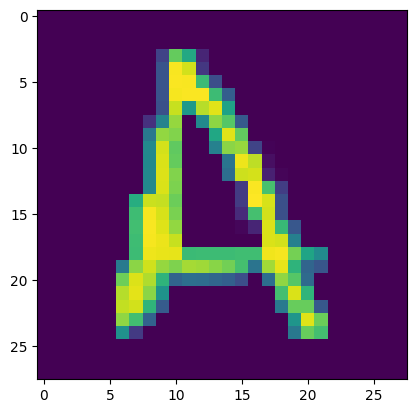

In [79]:
pic =cv2.imread(paths[0])
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

pic = cv2.resize(pic, (28, 28))

pic = 255 - pic
pic[pic < 150] = 0
# plt.imshow(pic)
pic = fix_image(pic, 2)
plt.imshow(pic)
# pic = np.reshape(pic, (1, 28, 28))
pic = pic.astype("float32") / 255


# pic = np.reshape(pic, (1, 28, 28))
pic = np.expand_dims(pic, -1)
# plt.imshow(pic)

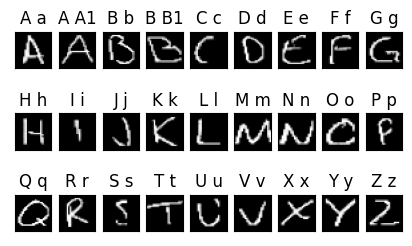

In [81]:
c = 3
l = int(len(paths)/c)
plt.figure(figsize=(5,3))
for i,p in enumerate(paths):
    plt.subplot(c,l,i+1)   
    
    # pic = convert_picture(p)
    pic = get_pic(p, 2)
    y_pred = m2.predict(np.reshape(pic, (1, 28, 28)), verbose=0)
    letter = by_merge_map_new[np.argmax(y_pred[0])]
    plt.title(f'{letter} {Path(p).stem}')
    
    plt.imshow(pic.reshape(28,28), cmap='gray')
    plt.xticks([]), plt.yticks([])